# Aviation Project

## Project Goal

The goal of this project is to determine which aircraft have the lowest risk for the company to start a new aerospace enterprise with.
The project will make recommendations for both commercial and private aircraft.

# Data Understanding

In this project I will work an Aviation Incident dataset found on [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)

# Business Understanding

1. What is the safest plane for commercial enterprise?
2. What is the safest plane for private enterprise?
3. 3 Concrete recommendations for the company.

In [186]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns

In [187]:
#read in the data with pandas
aviation_data_original = pd.read_csv('Data/Aviation_Data.csv', low_memory=False) 
                 #dtype={"Latitude":"str", "Longitude":"str","Broad.phase.of.flight":"str"}) 

In [188]:
#Make a copy of the dataframe to work on and leave original unaltered.
aviation_data = aviation_data_original.copy()

In [189]:
aviation_data.shape
#There are 90,348 rows, each one being an aviation incident, with 31 columns containing details about the incident.

(90348, 31)

In [190]:
#A cursory look at column names, types, and columns with missing values.
# I see most columns are strings except 'Number of Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries' and 'Total.Uninjured' are numerical floats.
#I see a lot of missing values. The only column without missing values is Investigation.Type. But Event.Id, Accident.Number, and Event.Date have almost no values and may serve as good indices.
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [191]:
#Number of missing values in each column
aviation_data.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [192]:
#Taking a look at the head and tail of the dataframe
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [193]:
aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [194]:
#Statistics for the 5 numerical columns
aviation_data.describe()

#The average Number of Engines is just over 1, with the max of 8. The IQR of number of engines is all within 1. Most data is about 1 engine aircraft.
#Injuries columns means are below 1 but contain very high maximums. The bulk of the data in in the IQR have zero injuries.

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [195]:
aviation_data.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [196]:
#Converting Event.Date column to datetime and adding month and year columns
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])
aviation_data['Month'] = aviation_data['Event.Date'].dt.month
aviation_data['Year'] = aviation_data['Event.Date'].dt.year

In [197]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [198]:
#Looking at percentage of non-null values in column aircraft.category to decide what to do with missing value in Aircraft.Category
aviation_data['Aircraft.Category'].value_counts(normalize=True)

Airplane             0.855360
Helicopter           0.106544
Glider               0.015734
Balloon              0.007155
Gyrocraft            0.005358
Weight-Shift         0.004987
Powered Parachute    0.002818
Ultralight           0.000929
Unknown              0.000434
WSFT                 0.000279
Powered-Lift         0.000155
Blimp                0.000124
UNK                  0.000062
Rocket               0.000031
ULTR                 0.000031
Name: Aircraft.Category, dtype: float64

In [199]:
# 85% of aircraft.category non-null values are airplane, so I'm going to fill in missing values in this column with airplane.
aviation_data['Aircraft.Category'] = aviation_data['Aircraft.Category'].fillna('Airplane')

In [200]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,10.0,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,7.0,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,8.0,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,6.0,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,8.0,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,Airplane,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12.0,2022.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12.0,2022.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0


In [201]:
# Removing anything that's not an airplane
airplane_data = aviation_data[aviation_data['Aircraft.Category'] == 'Airplane']

In [202]:
airplane_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,10.0,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,7.0,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,8.0,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,6.0,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,8.0,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,Airplane,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12.0,2022.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12.0,2022.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0


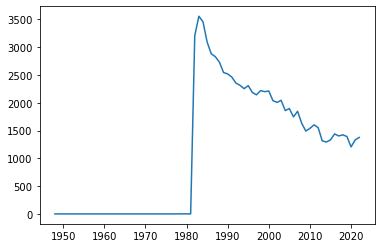

In [203]:
## Plotting number of aviation accidents over the years to see overall trend

incidents_by_year = airplane_data['Year'].value_counts().sort_index()

plt.plot(incidents_by_year.index, incidents_by_year.values)

Text(0, 0.5, 'Number of Incidents')

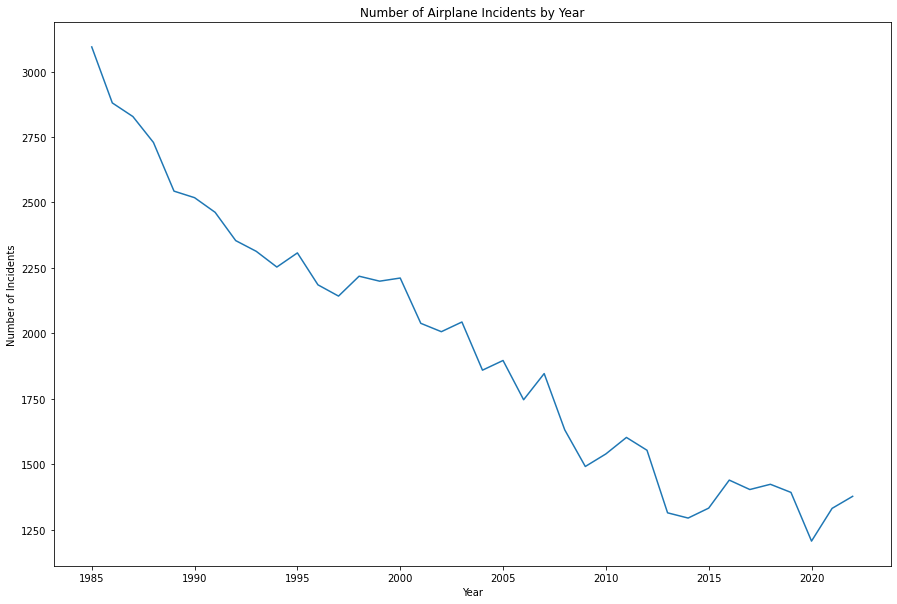

In [204]:
## Plotting again starting from 1985, no data available from before 1985

airplane_data_post1985 = airplane_data[airplane_data['Year'] >= 1985]
incidents_by_year = airplane_data_post1985['Year'].value_counts().sort_index()
plt.figure(figsize=(15, 10))
plt.plot(incidents_by_year.index, incidents_by_year.sort_index())
plt.title('Number of Airplane Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
 

In [209]:
#Deciding to work on only airplane data from 2013 onwards because overall trend of decreasing amounts of incidents per year seems to flatline at that time.
#Analysis after this point should be more aircraft specific instead of overall trend of increased safety.
airplane_data_modern = airplane_data[airplane_data['Year'] >= 2013]
airplane_data_modern

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
73173,20130101X94035,Accident,WPR13CA079,2013-01-01,"Chiloquin, OR",United States,423428N,1215226W,2S7,Chiloquin State Airport,Non-Fatal,Substantial,Airplane,N58677,CESSNA,182P,No,1.0,Reciprocating,091,NaN,Instructional,Pacific Aviation Northwest Inc,0.0,0.0,0.0,2.0,VMC,NaN,The flight instructors failure to maintain ai...,25-09-2020,1.0,2013.0
73174,20130102X03247,Accident,WPR13LA082,2013-01-02,"North Las Vegas, NV",United States,361238N,1151140W,VGT,North Las Vegas,Non-Fatal,Substantial,Airplane,N3AG,PIPER,PA-60-602P,No,2.0,Reciprocating,091,NaN,Instructional,Managed Aviation Inc,0.0,0.0,0.0,2.0,VMC,NaN,The pilots failure to maintain an adequate de...,25-09-2020,1.0,2013.0
73176,20130102X72037,Accident,ERA13FA101,2013-01-02,"Jasper, AL",United States,335310N,0087190W,JFX,Walker County Airport,Fatal,Destroyed,Airplane,N7700Y,PIPER,PA-30,No,2.0,Reciprocating,091,NaN,Personal,NaN,3.0,0.0,0.0,0.0,IMC,NaN,The student pilots poor judgment to take a mu...,25-09-2020,1.0,2013.0
73180,20130111X91754,Accident,CEN13LA127,2013-01-02,"Elkhart, IN",United States,413925N,0008625W,3C1,Mishawaka Pilots Club Airport,Non-Fatal,Substantial,Airplane,N707HL,LUSCOMBE,8,No,1.0,Reciprocating,091,NaN,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,NaN,"The pilots improper flare, which resulted in ...",25-09-2020,1.0,2013.0
73181,20130102X04956,Accident,WPR13FA083,2013-01-03,"Oceano, CA",United States,035358N,0120376W,L52,Oceano County Airport,Fatal,Substantial,Airplane,N45923,LUSCOMBE,8A,No,1.0,Reciprocating,091,NaN,Personal,GLEN P RAY,1.0,0.0,0.0,0.0,VMC,NaN,The pilots failure to maintain airplane contr...,NaN,1.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,Airplane,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12.0,2022.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12.0,2022.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0


In [210]:
airplane_data_modern['Purpose.of.flight'].value_counts()

Personal                     7577
Instructional                1503
Aerial Application            449
Business                      286
Positioning                   163
Flight Test                   119
Unknown                       113
Aerial Observation             98
Other Work Use                 82
Skydiving                      61
Ferry                          50
Executive/corporate            44
Air Race show                  42
Banner Tow                     42
Public Aircraft - Federal      30
Glider Tow                     20
Firefighting                   12
Public Aircraft                10
Public Aircraft - State         8
Public Aircraft - Local         8
ASHO                            6
PUBS                            3
Air Drop                        2
External Load                   1
Name: Purpose.of.flight, dtype: int64

In [214]:
#Clearning Purpose.of.flight column leaving Personal and changing all others to Commercial in order to make granularized recommendations for the business for Private vs. Commercial
airplane_data_modern.loc[airplane_data_modern['Purpose.of.flight'] != 'Personal', 'Purpose.of.flight'] = 'Commercial'
airplane_data_modern['Purpose.of.flight'].value_counts()

c:\Users\wjsmo\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Personal      7577
Commercial    5934
Name: Purpose.of.flight, dtype: int64

In [215]:
airplane_data_modern

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
73173,20130101X94035,Accident,WPR13CA079,2013-01-01,"Chiloquin, OR",United States,423428N,1215226W,2S7,Chiloquin State Airport,Non-Fatal,Substantial,Airplane,N58677,CESSNA,182P,No,1.0,Reciprocating,091,NaN,Commercial,Pacific Aviation Northwest Inc,0.0,0.0,0.0,2.0,VMC,NaN,The flight instructors failure to maintain ai...,25-09-2020,1.0,2013.0
73174,20130102X03247,Accident,WPR13LA082,2013-01-02,"North Las Vegas, NV",United States,361238N,1151140W,VGT,North Las Vegas,Non-Fatal,Substantial,Airplane,N3AG,PIPER,PA-60-602P,No,2.0,Reciprocating,091,NaN,Commercial,Managed Aviation Inc,0.0,0.0,0.0,2.0,VMC,NaN,The pilots failure to maintain an adequate de...,25-09-2020,1.0,2013.0
73176,20130102X72037,Accident,ERA13FA101,2013-01-02,"Jasper, AL",United States,335310N,0087190W,JFX,Walker County Airport,Fatal,Destroyed,Airplane,N7700Y,PIPER,PA-30,No,2.0,Reciprocating,091,NaN,Personal,NaN,3.0,0.0,0.0,0.0,IMC,NaN,The student pilots poor judgment to take a mu...,25-09-2020,1.0,2013.0
73180,20130111X91754,Accident,CEN13LA127,2013-01-02,"Elkhart, IN",United States,413925N,0008625W,3C1,Mishawaka Pilots Club Airport,Non-Fatal,Substantial,Airplane,N707HL,LUSCOMBE,8,No,1.0,Reciprocating,091,NaN,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,NaN,"The pilots improper flare, which resulted in ...",25-09-2020,1.0,2013.0
73181,20130102X04956,Accident,WPR13FA083,2013-01-03,"Oceano, CA",United States,035358N,0120376W,L52,Oceano County Airport,Fatal,Substantial,Airplane,N45923,LUSCOMBE,8A,No,1.0,Reciprocating,091,NaN,Personal,GLEN P RAY,1.0,0.0,0.0,0.0,VMC,NaN,The pilots failure to maintain airplane contr...,NaN,1.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,Airplane,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12.0,2022.0
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,Commercial,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12.0,2022.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0


In [220]:
#Creating individual dataframes containing only private flight information and only commercial flight information
private_data = airplane_data_modern[airplane_data_modern['Purpose.of.flight'] == 'Personal']
private_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
73176,20130102X72037,Accident,ERA13FA101,2013-01-02,"Jasper, AL",United States,335310N,0087190W,JFX,Walker County Airport,Fatal,Destroyed,Airplane,N7700Y,PIPER,PA-30,No,2.0,Reciprocating,091,NaN,Personal,NaN,3.0,0.0,0.0,0.0,IMC,NaN,The student pilots poor judgment to take a mu...,25-09-2020,1.0,2013.0
73180,20130111X91754,Accident,CEN13LA127,2013-01-02,"Elkhart, IN",United States,413925N,0008625W,3C1,Mishawaka Pilots Club Airport,Non-Fatal,Substantial,Airplane,N707HL,LUSCOMBE,8,No,1.0,Reciprocating,091,NaN,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,NaN,"The pilots improper flare, which resulted in ...",25-09-2020,1.0,2013.0
73181,20130102X04956,Accident,WPR13FA083,2013-01-03,"Oceano, CA",United States,035358N,0120376W,L52,Oceano County Airport,Fatal,Substantial,Airplane,N45923,LUSCOMBE,8A,No,1.0,Reciprocating,091,NaN,Personal,GLEN P RAY,1.0,0.0,0.0,0.0,VMC,NaN,The pilots failure to maintain airplane contr...,NaN,1.0,2013.0
73187,20130104X61334,Accident,ERA13FA105,2013-01-04,"Palm Coast, FL",United States,292732N,0081118W,XFL,Flagler County Airport,Fatal,Destroyed,Airplane,N375B,BEECH,H35,No,1.0,Reciprocating,091,NaN,Personal,NaN,3.0,0.0,0.0,0.0,IMC,NaN,A total loss of engine power after the failure...,25-09-2020,1.0,2013.0
73188,20130104X71845,Accident,ANC13CA019,2013-01-04,"Palmer, AK",United States,615419N,1485525W,NaN,NaN,Non-Fatal,Substantial,Airplane,N7780Y,PIPER,PA-18-150,No,1.0,Reciprocating,091,NaN,Personal,KELLER MATTHEW C,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's selection of unsuitable terrain fo...,25-09-2020,1.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90340,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,Minor,NaN,Airplane,N8786U,CESSNA,172F,No,NaN,NaN,091,NSCH,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022,12.0,2022.0
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,Airplane,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12.0,2022.0
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12.0,2022.0
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0


In [219]:
commercial_data = airplane_data_modern[airplane_data_modern['Purpose.of.flight'] == 'Commercial']
commercial_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Year
73173,20130101X94035,Accident,WPR13CA079,2013-01-01,"Chiloquin, OR",United States,423428N,1215226W,2S7,Chiloquin State Airport,Non-Fatal,Substantial,Airplane,N58677,CESSNA,182P,No,1.0,Reciprocating,091,NaN,Commercial,Pacific Aviation Northwest Inc,0.0,0.0,0.0,2.0,VMC,NaN,The flight instructors failure to maintain ai...,25-09-2020,1.0,2013.0
73174,20130102X03247,Accident,WPR13LA082,2013-01-02,"North Las Vegas, NV",United States,361238N,1151140W,VGT,North Las Vegas,Non-Fatal,Substantial,Airplane,N3AG,PIPER,PA-60-602P,No,2.0,Reciprocating,091,NaN,Commercial,Managed Aviation Inc,0.0,0.0,0.0,2.0,VMC,NaN,The pilots failure to maintain an adequate de...,25-09-2020,1.0,2013.0
73189,20130301X32618,Incident,DCA13WA061,2013-01-04,"Launceston, Australia",Australia,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,VH-VUZ,BOEING,737,No,NaN,NaN,129,SCHD,Commercial,VIRGIN AIR INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,03-11-2020,1.0,2013.0
73191,20130107X01002,Accident,CEN13WA126,2013-01-05,"Saint Pierre de Bressieux, France",France,NaN,NaN,NaN,NaN,Fatal,Substantial,Airplane,CN-DAY,PIPER,PA34,No,2.0,NaN,NUSN,NaN,Commercial,ON FILE,5.0,0.0,0.0,0.0,NaN,NaN,NaN,03-11-2020,1.0,2013.0
73194,20130107X32320,Incident,DCA13IA037,2013-01-07,"Boston, MA",United States,422147N,0071023W,BOS,Gen Edward Lawrence Logan Intl,NaN,Minor,Airplane,JA829J,BOEING,787,No,NaN,NaN,129,SCHD,Commercial,JAPAN AIRLINES INTERNATIONAL CO LTD,0.0,0.0,0.0,0.0,VMC,NaN,an internal short circuit within a cell of the...,14-06-2021,1.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,Substantial,Airplane,N398KL,SWEARINGEN,SA226TC,No,2.0,NaN,135,SCHD,Commercial,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,12.0,2022.0
90338,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,N393HA,AIRBUS,A330-243,No,NaN,NaN,121,SCHD,Commercial,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12.0,2022.0
90341,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,Minor,NaN,Airplane,N321GD,GRUMMAN AMERICAN AVN. CORP.,AA-5B,No,NaN,NaN,091,NaN,Commercial,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022,12.0,2022.0
90342,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,Fatal,NaN,Airplane,PP-IRC,AIR TRACTOR,AT502,No,NaN,NaN,NaN,NaN,Commercial,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022,12.0,2022.0


Plotting Incidents by number of engines on the airplane shows aircraft with more than one engine have much fewer incidents. The limitation of the data is a factor here in that 
we don't know the total number of operating aircraft with one or multiple engines.

<AxesSubplot:>

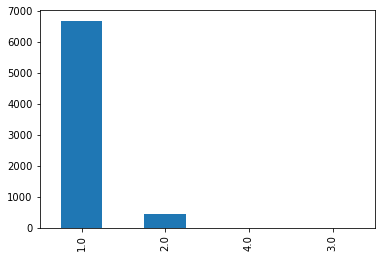

In [233]:
# Number of incidents by number of engines for private data
private_data['Number.of.Engines'].value_counts(sort=True).plot.bar()


<AxesSubplot:>

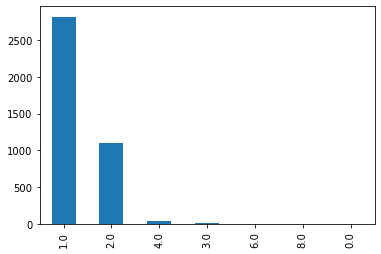

In [232]:
#Number of incidents by number of engines for commercial data
commercial_data['Number.of.Engines'].value_counts(sort=True).plot.bar()

In [234]:
# Normalizing strings in 'Make' column for private data
private_data['Make'] = private_data['Make'].str.upper()

<ipython-input-234-ce23a4fd7fdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_data['Make'] = private_data['Make'].str.upper()


<AxesSubplot:>

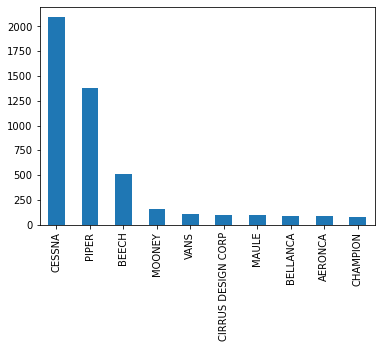

In [236]:
# Top 10 makes with incidents for Private Data
private_data['Make'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:xlabel='Make'>

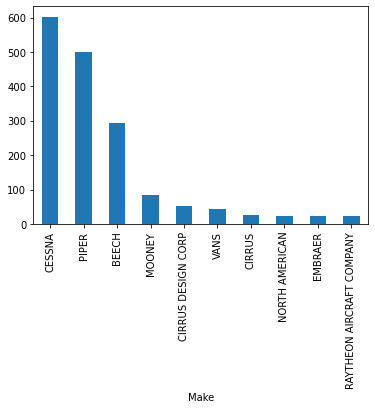

In [237]:
# Top 10 Fatalities by Make for Private Data
private_data.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [238]:
# Normalizing strings in 'Make' column for commercial data
commercial_data['Make'] = commercial_data['Make'].str.upper()

<ipython-input-238-0ceba2a6903d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_data['Make'] = commercial_data['Make'].str.upper()


<AxesSubplot:>

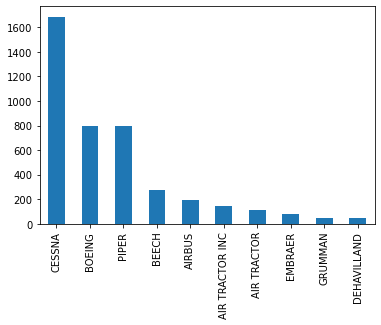

In [240]:
# Top 10 makes with incidents in Commercial Data
commercial_data['Make'].value_counts().head(10).plot(kind='bar')

# Conclusion - Cessna has the most incidents. Data limitation again in Cessna might just be extremely popular.

<AxesSubplot:xlabel='Make'>

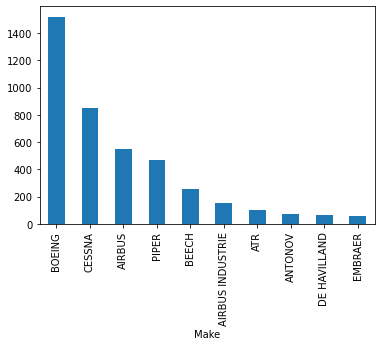

In [241]:
# Top 10 Fatalities by Make for Commercial Data
commercial_data.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

# Conclusion - Cessna has the most accidents but Boeing leads in fatalities?

<AxesSubplot:xlabel='Make'>

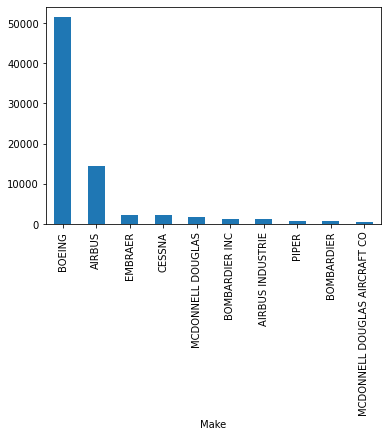

In [242]:
# Top 10 Uninjured by Make 
commercial_data.groupby('Make')['Total.Uninjured'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

# Conclusion - Boeing also has the highest number of uninjured per incident. Boeing is just probably overrepresented because they are the most popular commercial airliner.

In [243]:
# Look at ratio of Fatalites to Non Injured as benchmark 
# Must have value -- Anything > 0 for both columns 

(commercial_data[(commercial_data['Total.Uninjured'] > 0 )&
                (commercial_data['Total.Fatal.Injuries'] > 0)].groupby('Make')['Total.Uninjured'].sum()/commercial_data[(commercial_data['Total.Uninjured'] > 0 )&
                (commercial_data['Total.Fatal.Injuries'] > 0)].groupby('Make')['Total.Fatal.Injuries'].sum()).sort_values(ascending=False)

# Ratio of Uninjured to Fatalities sum -- Higher the better.
# Example is SAAB. For every one person that is killed, 37 are uninjured. 

# CESSNA is not so good here.

Make
SAAB            37.000000
BOEING          20.615385
CESSNA           2.000000
PIPER            1.428571
LEARJET          1.000000
DE HAVILLAND     1.000000
C A S A          1.000000
ANDREWS          1.000000
SUKHOI           0.951220
dtype: float64